In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, clear_output
import utils_results as ut

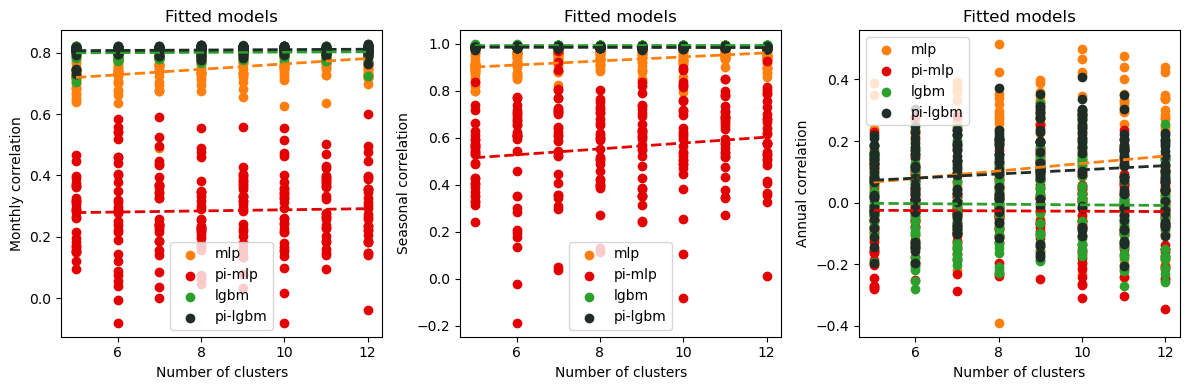

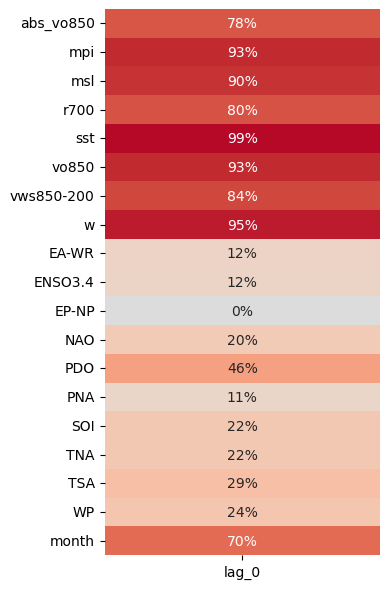

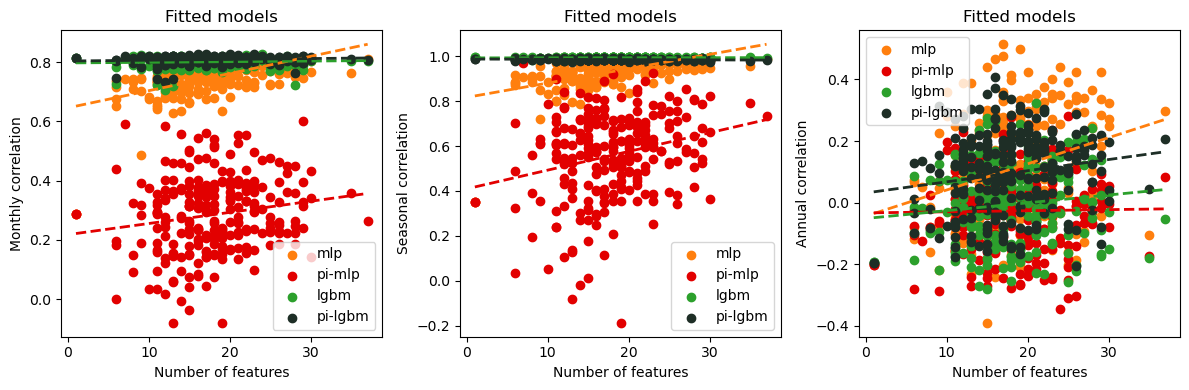

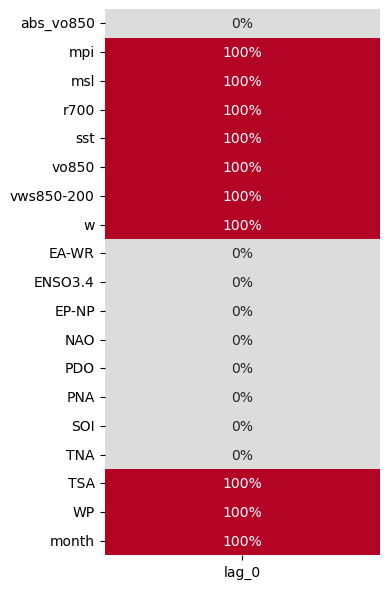

In [2]:
# Define widgets
widget_layout1 = widgets.Layout(width='220px')
widget_layout2 = widgets.Layout(width='170px')

fitness_model_widget = widgets.Dropdown(
    options={'All': 'all', 'Linear regression': 'linreg', 'LightGBM': 'lgbm', 'Physically Informed LightGBM': 'pi-lgbm'},
    value='all',
    style={'description_width': 'initial'},
    layout=widget_layout1,
)
label_fitness_model_widget = widgets.HTML(value="<b>Fitness function model:</b>", layout=widget_layout2)
fitness_model_box = HBox([label_fitness_model_widget, fitness_model_widget])

top_runs_widget = widgets.Dropdown(
    options={'Top 1': 1, 'Top 2': 2, 'Top 3': 3, 'Top 4': 4, 'Top 5': 5},
    value=1,
    style={'description_width': 'initial'},
    layout=widget_layout1,
)
label_top_runs_widget = widgets.HTML(value="<b>Top Runs:</b>", layout=widget_layout2)
top_runs_box = HBox([label_top_runs_widget, top_runs_widget])


final_model_widget = widgets.Dropdown(
    options={'All': 'all', 'Shallow NN': 'mlp', 'LightGBM': 'lgbm', 'Physically Informed Shallow NN': 'pi-mlp', 'Physically Informed LightGBM': 'pi-lgbm'},
    value='all',
    style={'description_width': 'initial'},
    layout=widget_layout1,
)
label_final_model_widget = widgets.HTML(value="<b>Final model:</b>", layout=widget_layout2)
final_model_box = HBox([label_final_model_widget, final_model_widget])

clustering_type = widgets.Dropdown(
    options={'All': 'all', 'Normal': '_nc', 'Anomaly': 'Anc', 'Deseasonalized': 'DSnc'},
    value='all',
    style={'description_width': 'initial'},
    layout=widget_layout1,
)
label_clustering_type = widgets.HTML(value="<b>Clustering type:</b>", layout=widget_layout2)
clustering_box = HBox([label_clustering_type, clustering_type])

basin_widget = widgets.Dropdown(
    options=['GLB', 'NA', 'NEP', 'NWP', 'NI', 'SP', 'SI'],
    value='GLB',
    style={'description_width': 'initial'},
    layout=widget_layout1,
)
label_basin_widget = widgets.HTML(value="<b>Basin:</b>", layout=widget_layout2)
basin_box = HBox([label_basin_widget, basin_widget])

n_clusters_widget = widgets.IntSlider(
    value=4,
    min=4,
    max=12,
    step=1,
    style={'description_width': 'initial', 'handle_color': 'lightgreen'},
    layout=widget_layout1,
)
label_n_clusters_widget = widgets.HTML(value="<b>Number of clusters:</b>", layout=widget_layout2)
n_clusters_box = HBox([label_n_clusters_widget, n_clusters_widget])

update_button = widgets.Button(
    description = 'Update',
    icon = "check",
    layout=widgets.Layout(height='auto'),
    style={'button_color': 'lightgreen'}
)

In [ ]:
def update_output(basin, fitness_model, cluster_type, final_model, n_clusters_widg, top_n):
    # Load the data containing the performances of the models
    project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
    fs_dir = os.path.join(project_dir, 'tcg_fsM')
    results_dir = os.path.join(fs_dir, 'results')
    track_file = os.path.join(results_dir, f'sim_performance_{basin}.csv')
    track_df = pd.read_csv(track_file, index_col=0)
    # Filter data to consider only the runs with 9 climate indices
    track_df = track_df[track_df.index.str.contains('nd9')]
    # Filter the data according to the selected fitness model
    if fitness_model != 'all':
        track_df = track_df[track_df.index.str.contains(fitness_model)]
    # Filter the data according to the selected clustering type
    if cluster_type != 'all':
        track_df = track_df[track_df.index.str.contains(cluster_type)]
    # Plot the performances of the models against the number of clusters in the data
    fig_cluster = plt.figure(figsize=(12, 4))
    gs_cluster = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], figure=fig_cluster)
    corr_columns = ['R_', 'R_S_', 'R_Y_']
    for c, col in enumerate(corr_columns):
        ax = fig_cluster.add_subplot(gs_cluster[c])
        # mlp
        ax.scatter(track_df['n_clusters'], track_df[f'{col}mlp'], c='#ff7f0e', label='mlp')
        z = np.polyfit(track_df['n_clusters'], track_df[f'{col}mlp'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_clusters'], p(track_df['n_clusters']), color='#ff7f0e', linestyle='--', linewidth=2)
        # pi-mlp
        ax.scatter(track_df['n_clusters'], track_df[f'{col}pi-mlp'], c='#e20000', label='pi-mlp')
        z = np.polyfit(track_df['n_clusters'], track_df[f'{col}pi-mlp'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_clusters'], p(track_df['n_clusters']), color='#e20000', linestyle='--', linewidth=2)
        # lgbm
        ax.scatter(track_df['n_clusters'], track_df[f'{col}lgbm'], c='#2ca02c', label='lgbm')
        z = np.polyfit(track_df['n_clusters'], track_df[f'{col}lgbm'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_clusters'], p(track_df['n_clusters']), color='#2ca02c', linestyle='--', linewidth=2)
        # pi-lgbm
        ax.scatter(track_df['n_clusters'], track_df[f'{col}pi-lgbm'], c='#1e2e26', label='pi-lgbm')
        z = np.polyfit(track_df['n_clusters'], track_df[f'{col}pi-lgbm'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_clusters'], p(track_df['n_clusters']), color='#1e2e26', linestyle='--', linewidth=2)
        ax.legend()
        if fitness_model == 'linreg':
            ax.set_title(f'Fitted linear regression')
        elif fitness_model == 'lgbm':
            ax.set_title(f'Fitted LightGBM')
        elif fitness_model == 'pi-lgbm':
            ax.set_title(f'Fitted Physically Informed LightGBM')
        else:
            ax.set_title(f'Fitted models')
        if cluster_type == '_nc':
            ax.set_xlabel('Number of clusters (normal)')
        elif cluster_type == 'Anc':
            ax.set_xlabel('Number of clusters (anomaly)')
        else:
            ax.set_xlabel('Number of clusters')
        if c == 0:
            ax.set_ylabel('Monthly correlation')
        elif c == 1:
            ax.set_ylabel('Seasonal correlation')
        else:
            ax.set_ylabel('Annual correlation')
    fig_cluster.set_tight_layout(True)
    # Get the number of features selected for each simulation and the selected variables
    atm_vars = ['abs_vo850', 'mpi', 'msl', 'r700', 'sst', 'vo850', 'vws850-200', 'w']
    idx_vars = ['EA-WR', 'ENSO3.4', 'EP-NP', 'NAO', 'PDO', 'PNA', 'SOI', 'TNA', 'TSA', 'WP', 'month']
    experiments_folders = []
    selected_vars_df_list = []
    for exp, experiment in enumerate(track_df.iterrows()):
        experiment_folder = experiment[0]
        output_dir = os.path.join(results_dir, basin, experiment_folder)
        n_clusters = experiment[1]['n_clusters']
        model_kind = experiment[1]['model']
        n_vars = ''.join(filter(str.isdigit, experiment[0].split('_')[-2]))
        n_idxs = ''.join(filter(str.isdigit, experiment[0].split('_')[-1]))
        experiment_filename = f'1970-2022_{n_clusters}clusters_{n_vars}vars_{n_idxs}idxs.csv'
        sol_filename = f'{model_kind}_' + experiment_filename
        best_sol_path = os.path.join(output_dir, f'best_solution_{sol_filename}')
        best_solution = pd.read_csv(best_sol_path, sep=',', header=None)
        predictor_file = 'predictors_' + experiment_filename
        nc_string = experiment[0].split('_')[2]
        if "A" in nc_string:
            cluster_data = f'{basin}_{n_clusters}clusters_anomaly'
        else:
            cluster_data = f'{basin}_{n_clusters}clusters'
        data_dir = os.path.join(fs_dir, 'data', cluster_data)
        predictors_path = os.path.join(data_dir, predictor_file)
        predictors_df = pd.read_csv(predictors_path, index_col=0)
        predictors_df.index = pd.to_datetime(predictors_df.index)
        # Append the experiment folder name to the list and the list of selected variables
        selected_vars_df = ut.df_selected_vars(predictors_df, best_solution)
        selected_vars_df_list.append(selected_vars_df)
        experiments_folders.append(experiment_folder)
    # Plot the heatmap with the variable selection
    heatmap_nocluster = ut.vars_selection_heatmaps_no_cluster(experiments_folders, selected_vars_df_list, atm_vars, idx_vars, display_percentage=True)
    # Plot the simulation performances against the number of features
    fig_features = plt.figure(figsize=(12, 4))
    gs_features = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], figure=fig_features)
    corr_columns = ['R_', 'R_S_', 'R_Y_']
    for c, col in enumerate(corr_columns):
        ax = fig_features.add_subplot(gs_features[c])
        # mlp
        ax.scatter(track_df['n_features'], track_df[f'{col}mlp'], c='#ff7f0e', label='mlp')
        z = np.polyfit(track_df['n_features'], track_df[f'{col}mlp'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_features'].sort_values(), p(track_df['n_features'].sort_values()), color='#ff7f0e', linestyle='--', linewidth=2)
        # pi-mlp
        ax.scatter(track_df['n_features'], track_df[f'{col}pi-mlp'], c='#e20000', label='pi-mlp')
        z = np.polyfit(track_df['n_features'], track_df[f'{col}pi-mlp'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_features'].sort_values(), p(track_df['n_features'].sort_values()), color='#e20000', linestyle='--', linewidth=2)
        # lgbm
        ax.scatter(track_df['n_features'], track_df[f'{col}lgbm'], c='#2ca02c', label='lgbm')
        z = np.polyfit(track_df['n_features'], track_df[f'{col}lgbm'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_features'].sort_values(), p(track_df['n_features'].sort_values()), color='#2ca02c', linestyle='--', linewidth=2)
        # pi-lgbm
        ax.scatter(track_df['n_features'], track_df[f'{col}pi-lgbm'], c='#1e2e26', label='pi-lgbm')
        z = np.polyfit(track_df['n_features'], track_df[f'{col}pi-lgbm'], 1)
        p = np.poly1d(z)
        ax.plot(track_df['n_features'].sort_values(), p(track_df['n_features'].sort_values()), color='#1e2e26', linestyle='--', linewidth=2)
        ax.legend()
        if fitness_model == 'linreg':
            ax.set_title(f'Fitted linear regression')
        elif fitness_model == 'lgbm':
            ax.set_title(f'Fitted LightGBM')
        elif fitness_model == 'pi-lgbm':
            ax.set_title(f'Fitted Physically Informed LightGBM')
        else:
            ax.set_title(f'Fitted models')
        if cluster_type == '_nc':
            ax.set_xlabel('Number of features (normal)')
        elif cluster_type == 'Anc':
            ax.set_xlabel('Number of features (anomaly)')
        else:
            ax.set_xlabel('Number of features')
        if c == 0:
            ax.set_ylabel('Monthly correlation')
        elif c == 1:
            ax.set_ylabel('Seasonal correlation')
        else:
            ax.set_ylabel('Annual correlation')
    fig_features.set_tight_layout(True)
    # Display the plots
    cluster_vbox = VBox([
        widgets.HTML(value='<div style="text-align: center;"><h2>Performance against number of clusters</h2></div>', layout=widgets.Layout(width="1200px")),
        ut.PIL_to_widget(ut.figure_to_PIL(fig_cluster), 1200, 600)
    ])
    features_vbox = VBox([
        widgets.HTML(value='<div style="text-align: center;"><h2>Performance against number of features</h2></div>', layout=widgets.Layout(width="1200px")),
        ut.PIL_to_widget(ut.figure_to_PIL(fig_features), 1200, 600)
    ])
    display(VBox([cluster_vbox, features_vbox]))
    # If selected a specific number of clusters filter the df according to that number of clusters
    if n_clusters_widg != 4 and cluster_type != 'all':
        track_df = track_df[track_df['n_clusters'] == n_clusters_widg]
    # Get the top runs according to the selected final model
    if final_model != 'all':
        performance_col = f'R_Y_{final_model}'
        sorted_df = track_df.sort_values(performance_col, ascending=False)
        performance_col_noFS = f'R_Y_{final_model}_noFS'
        sorted_df_noFS = track_df.sort_values(performance_col_noFS, ascending=False)
    else:
        performance_col = ['R_Y_mlp', 'R_Y_pi-mlp', 'R_Y_lgbm', 'R_Y_pi-lgbm']
        track_df['max_R_Y'] = track_df[performance_col].max(axis=1)
        sorted_df = track_df.sort_values('max_R_Y', ascending=False)
        performance_col_noFS = ['R_Y_mlp_noFS', 'R_Y_pi-mlp_noFS', 'R_Y_lgbm_noFS', 'R_Y_pi-lgbm_noFS']
        track_df['max_R_Y_noFS'] = track_df[performance_col_noFS].max(axis=1)
        sorted_df_noFS = track_df.sort_values('max_R_Y_noFS', ascending=False)
    top_runs_df = sorted_df.head(top_n)
    top_runs_noFS_df = sorted_df_noFS.head(top_n)
    # Display the heatmap of variable selection for the 5 top runs independently from the number of clusters
    experiments_folders = np.array(experiments_folders)
    idxs_selected = np.where(np.isin(experiments_folders, top_runs_df.index.to_list()))[0]
    selected_vars_df_list_top5 = []
    for idx in idxs_selected:
        selected_vars_df_list_top5.append(selected_vars_df_list[idx])
    cluster_type_str = 'all' if cluster_type == 'all' else 'anomaly' if cluster_type == 'Anc' else 'normal'
    text_htnc = widgets.HTML(
        value=f'''<div style="text-align: center;"><h2>Variable selection % for all simulations<br>with {fitness_model} fitness model and {cluster_type_str} cluster type</h2></div>'''
        )
    heatmap_nocluster_top5 = ut.vars_selection_heatmaps_no_cluster(top_runs_df.index.to_list(), selected_vars_df_list_top5, atm_vars, idx_vars, display_percentage=True)
    text_htnc5 = widgets.HTML(
        value=f'''<div style="text-align: center;"><h2>Variable selection % for Top {top_n} simulations<br>with {fitness_model} fitness model and {cluster_type_str} cluster type</h2></div>'''
        )
    display(HBox([VBox([text_htnc, ut.PIL_to_widget(ut.figure_to_PIL(heatmap_nocluster), 400, 200)]), VBox([text_htnc5, ut.PIL_to_widget(ut.figure_to_PIL(heatmap_nocluster_top5), 400, 200)])]))
    # If n_clusters is 4 then we display the top runs independently from the number of clusters
    # If n_clusters is not 4 then we display the top runs for the clusters also if a specific clustering type is selected
    if n_clusters_widg != 4 and cluster_type != 'all':
        selected_vars_df_list = []
        experiment_filename = f'1970-2022_{n_clusters_widg}clusters_{n_vars}vars_{n_idxs}idxs.csv'
        data_dir = os.path.join(fs_dir, 'data', f'{basin}_{n_clusters_widg}clusters_anomaly') if cluster_type == 'Anc' else os.path.join(fs_dir, 'data', f'{basin}_{n_clusters_widg}clusters')
        predictors_df = pd.read_csv(os.path.join(data_dir, f'predictors_{experiment_filename}'), index_col=0)
        predictors_df.index = pd.to_datetime(predictors_df.index)
        for experiment_name in top_runs_df.index.to_list():
            model_kind = experiment_name.split('_')[1]
            best_solution = pd.read_csv(os.path.join(results_dir, basin, experiment_name, f'best_solution_{model_kind}_{experiment_filename}'), sep=',', header=None)
            selected_vars_df = ut.df_selected_vars(predictors_df, best_solution)
            selected_vars_df_list.append(selected_vars_df)
        # Build the heatmap with variable selection
        heatmap, df60 = ut.vars_selection_heatmaps(top_runs_df.index.to_list(), n_clusters_widg, selected_vars_df_list, atm_vars, idx_vars, display_percentage=True)
    # Compute the percentages on the runs considered where models with feature selection outperformed models without feature selection
    n_runs = len(track_df)
    times_mlp = 0
    times_pi_mlp = 0
    times_lgbm = 0
    times_pi_lgbm = 0
    for r, run in enumerate(track_df.index):
        sel_row = track_df.loc[run]
        if sel_row['R_Y_mlp'] > sel_row['R_Y_mlp_noFS']:
            times_mlp += 1
        if sel_row['R_Y_pi-mlp'] > sel_row['R_Y_pi-mlp_noFS']:
            times_pi_mlp += 1
        if sel_row['R_Y_lgbm'] > sel_row['R_Y_lgbm_noFS']:
            times_lgbm += 1
        if sel_row['R_Y_pi-lgbm'] > sel_row['R_Y_pi-lgbm_noFS']:
            times_pi_lgbm += 1
    mlp_perc = times_mlp / n_runs * 100
    pi_mlp_perc = times_pi_mlp / n_runs * 100
    lgbm_perc = times_lgbm / n_runs * 100
    pi_lgbm_perc = times_pi_lgbm / n_runs * 100
    tot_times = times_mlp + times_pi_mlp + times_lgbm + times_pi_lgbm
    tot_perc = tot_times / (n_runs * 4) * 100
    tot_text_widget = widgets.HTML(value=f'<div style="text-align: center;">The models with FS perform better <b>{tot_perc:.2f}</b>% of the times</div>', layout=widgets.Layout(width="1200px"))
    mlp_text_widget = widgets.HTML(value=f'<div style="text-align: center;">The NN with FS performs better <b>{mlp_perc:.2f}</b>% of the times</div>', layout=widgets.Layout(width="1200px"))
    pi_mlp_text_widget = widgets.HTML(value=f'<div style="text-align: center;">The PI-NN with FS performs better <b>{pi_mlp_perc:.2f}</b>% of the times</div>', layout=widgets.Layout(width="1200px"))
    lgbm_text_widget = widgets.HTML(value=f'<div style="text-align: center;">The LGBM with FS performs better <b>{lgbm_perc:.2f}</b>% of the times</div>', layout=widgets.Layout(width="1200px"))
    pi_lgbm_text_widget = widgets.HTML(value=f'<div style="text-align: center;">The PI-LGBM with FS performs better <b>{pi_lgbm_perc:.2f}</b>% of the times</div>', layout=widgets.Layout(width="1200px"))
    perc_text_box = VBox([tot_text_widget, mlp_text_widget, pi_mlp_text_widget, lgbm_text_widget, pi_lgbm_text_widget])
    cluster_string = 'all' if n_clusters_widg == 4 else n_clusters_widg
    perc_text_title = widgets.HTML(
        value=f'<div style="text-align: center;"><h2>FS outperformances % for simulations with {fitness_model} fitness model, {cluster_string} number of clusters, {cluster_type_str} cluster type</h2></div>',
        layout=widgets.Layout(width="1200px"),
        )
    display(VBox([perc_text_title, perc_text_box]))
    # Create the output and display the plots for the runs selected
    annual_evolution_list = []
    best_sol_list = []
    display(widgets.HTML(value=f'<div style="text-align: center;"><h2>Top {top_n} runs</h2></div>', layout=widgets.Layout(width="1200px")))
    for r, run in enumerate(top_runs_df.index):
        # Get which model has performed better
        if len(performance_col) == 1:
            best_model = performance_col
        else:
            sel_row = track_df.loc[run]
            best_model = sel_row[performance_col].idxmax()
            bestR = sel_row[performance_col].max()
        best_model = best_model.split('_')[-1]
        # Get the run directory and the figures directory 
        run_dir = os.path.join(results_dir, basin, run)
        figs_dir = os.path.join(run_dir, 'figures')
        # Load the figures
        annual_ev_fig = ut.load_pdf_convert_to_image(os.path.join(figs_dir, 'annual_evolution.pdf'))
        annual_ev_fig_widget = ut.PIL_to_widget(annual_ev_fig, 800, 100)
        best_sol_fig = ut.load_pdf_convert_to_image(os.path.join(figs_dir, 'best_sol.pdf'))
        best_sol_fig_widget = ut.PIL_to_widget(best_sol_fig, 300, 150)
        # Display the figures
        vbox = VBox([
            widgets.HTML(value=f'<div style="text-align: center;"><h3>Run <u>{run}</u> - Top {r+1} - {best_model} - R: {bestR:.3f}</h3></div>'),
            annual_ev_fig_widget,
        ], layout=widgets.Layout(min_width='850px'))
        annual_evolution_list.append(vbox)
        vbox = VBox([
            widgets.HTML(value=f'<div style="text-align: center;"><h3>Run <u>{run}</u><br>Top {r+1}</h3></div>'),
            best_sol_fig_widget,
        ], layout=widgets.Layout(min_width='100px'))
        best_sol_list.append(vbox)
    display(HBox(annual_evolution_list, layout=widgets.Layout(overflow='scroll hidden', flex_flow='row', display='flex')))
    display(HBox(best_sol_list, layout=widgets.Layout(overflow='scroll hidden', flex_flow='row', display='flex')))
    # Display the heatmap with the variable selection
    if n_clusters_widg != 4 and cluster_type != 'all':
        cluster_type_str = 'anomaly' if cluster_type == 'Anc' else 'normal'
        display(widgets.HTML(value=f'<div style="text-align: center;"><h2>Variable selection % for top {top_n} runs of {n_clusters_widg} {cluster_type_str} clusters</h2></div>',
                             layout=widgets.Layout(width="1200px")))
        display(heatmap)
    # Display the top runs without feature selection
    annual_evolution_list = []
    display(widgets.HTML(value=f'<div style="text-align: center;"><h2>Top {top_n} runs without Feature Selection</h2></div>', layout=widgets.Layout(width="1200px")))
    for r, run in enumerate(top_runs_noFS_df.index):
        # Get the model having the best performance
        if len(performance_col_noFS) == 1:
            best_model = performance_col_noFS
        else:
            sel_row = sorted_df_noFS.loc[run]
            best_model = sel_row[performance_col_noFS].idxmax()
            bestR = sel_row[performance_col_noFS].max()
        best_model = best_model.split('_')[-2]
        run_dir = os.path.join(results_dir, basin, run)
        figs_dir = os.path.join(run_dir, 'figures')
        # Load the figures
        annual_ev_fig = ut.load_pdf_convert_to_image(os.path.join(figs_dir, 'annual_evolution.pdf'))
        annual_ev_fig_widget = ut.PIL_to_widget(annual_ev_fig, 800, 100)
        # Display the figures
        vbox = VBox([
            widgets.HTML(value=f'<div style="text-align: center;"><h3>Run <u>{run}</u> - Top {r+1} - {best_model} - R: {bestR:.3f}</h3></div>'),
            annual_ev_fig_widget,
        ], layout=widgets.Layout(min_width='850px'))
        annual_evolution_list.append(vbox)
    display(HBox(annual_evolution_list, layout=widgets.Layout(overflow='scroll hidden', flex_flow='row', display='flex')))

# Binding the widgets for displaying
widgets_layout = HBox([VBox([basin_box, clustering_box, fitness_model_box, final_model_box, n_clusters_box, top_runs_box]), update_button])
display(widgets_layout)

outputs = widgets.Output()

def on_button_clicked(b):
    with outputs:
        clear_output(wait=True)
        update_output(basin_widget.value, fitness_model_widget.value, clustering_type.value, final_model_widget.value, n_clusters_widget.value, top_runs_widget.value)

update_button.on_click(on_button_clicked)
display(outputs)

Output()